In [21]:
# load the data 

import pandas as pd;
df = pd.read_csv ('Data Risk Assessment - Dataset/Data_08_Simulated Loan Risk Assessment Data.csv')
df.shape
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,31.0,male,Bachelor,96852.0,10,MORTGAGE,5000.0,PERSONAL,6.91,0.05,9.0,682,Yes,0
1,29.0,female,High School,96737.0,6,MORTGAGE,6000.0,DEBTCONSOLIDATION,7.14,0.06,8.0,519,No,0
2,32.0,male,Bachelor,96948.0,6,MORTGAGE,12000.0,DEBTCONSOLIDATION,12.68,0.12,10.0,668,Yes,0
3,29.0,female,Associate,96865.0,4,MORTGAGE,20000.0,VENTURE,14.96,0.21,10.0,679,No,0
4,33.0,female,Bachelor,96986.0,15,MORTGAGE,8000.0,EDUCATION,20.00,0.08,5.0,667,No,0


In [24]:
#Learn the structure of the dataset

df.info
df.describe()
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [25]:
# Check missing values

df.isna().sum().sort_values(ascending=False)
(df.isna().mean()*100).round(2)


person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

In [26]:
#Check for outliers or invalid entries

df['person_age'].describe()
df['person_income'].describe()
df['loan_int_rate'].describe()

count    19999.000000
mean        11.016180
std          2.871614
min          5.420000
25%          8.870000
50%         11.010000
75%         12.910000
max         20.000000
Name: loan_int_rate, dtype: float64

In [27]:
# Understand the target (loan_status)

df['loan_status'].value_counts(normalize=True)

loan_status
0    0.780289
1    0.219711
Name: proportion, dtype: float64

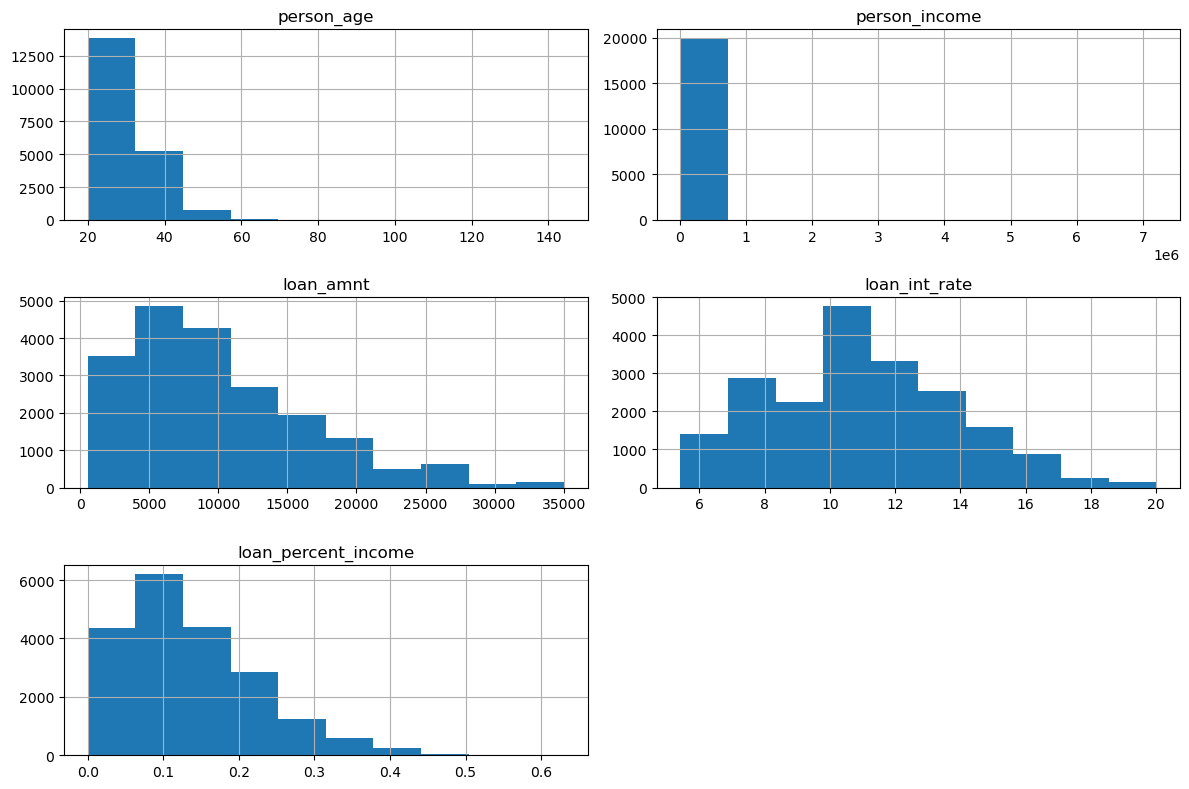

In [28]:
# Explore numeric variables (univariate)

import matplotlib.pyplot as plt
df[['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income']].hist(figsize=(12,8))
plt.tight_layout()


<Axes: xlabel='loan_status', ylabel='person_income'>

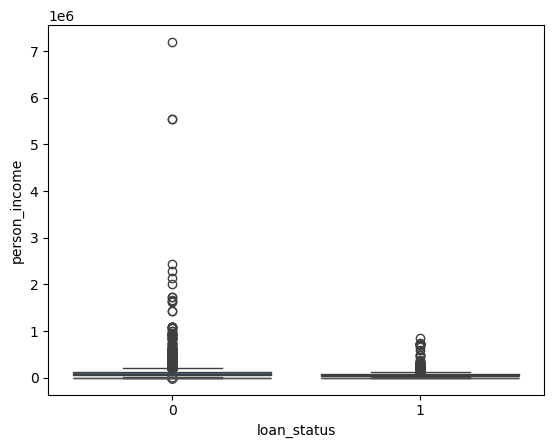

In [29]:
#Explore relationships with target (Numeric vs Target)

import seaborn as sns 
sns.boxplot(x='loan_status', y='person_income', data=df)
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)

In [30]:
#Explore relationships with target (Categorical vs Target)

pd.crosstab(df['person_gender'],df['loan_status'], normalize='index')

pd.crosstab(df['loan_intent'],df['loan_status'], normalize='index')


loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,0.672147,0.327853
EDUCATION,0.829363,0.170637
HOMEIMPROVEMENT,0.777680,0.222320
MEDICAL,0.710237,0.289763
PERSONAL,0.809707,0.190293
VENTURE,0.874675,0.125325


<Axes: >

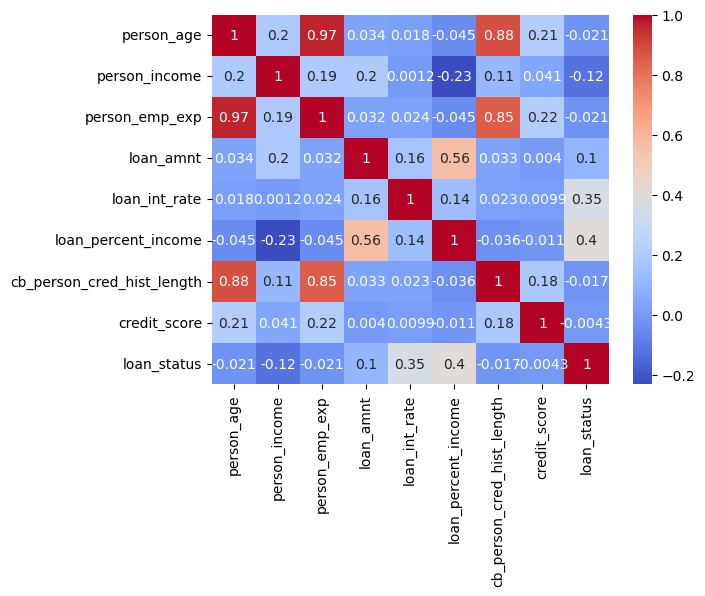

In [31]:
#Correlation overview

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')